# BUDS Report 10.5: More of Group


### Table of Contents

1. <a href='#section 1'>A Quick Look at the Data</a>
2. <a href='#section 2'>Compensation Shares</a>
3. <a href='#section 3'>Visualizing High Compensation Shares</a>

In [1]:
# run this cell
from datascience import *
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

## 1. A Quick Look at the Data <a id='section 1'></a>

Once again, load the NBA table so that we can use it. We'll relabel it so that your analysis is easier.

In [2]:
nba = Table.read_table('nba_salaries.csv')
nba = nba.relabeled('2015-2016 SALARY', 'SALARY')
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


<div class="alert alert-warning">
    <b>PRACTICE:</b> Write code that evaluates to the lowest salary paid to an NBA player in the 2015-2016 season. Then, repeat the proces for the highest salary paid. 

Once you have found those, write code that prints the following statements. Instead of salaries of \\$10,000 and \$100,000 be sure to use the true lowest and highest salaries of the NBA.

<ul>
    <li>The lowest salary paid is \$10000
    <li>The highest slary paid is \$100000
    </ul>
    </div>

In [ ]:
...

In [3]:
# SOLUTION
lowest = nba.sort('SALARY').column('SALARY').item(0)
highest = nba.sort('SALARY', descending=True).column('SALARY').item(0)

print("The lowest salary paid is $" + str(lowest * 1000000))
print("The highest salary paid is $" + str(highest * 1000000))

The lowest salary paid is $30888.0
The highest salary paid is $25000000.0


## 2. Compensation Shares <a id='section 2'></a>

Next, create a table that contains the percentage of total team compensation that each player receives. For example, a player who is paid \\$50,000 in a team that pays a total of \$500,000 to its players will have a share of 10%.
    
In order to do this, you need to have a column in your `nba` table that denotes each player's team's total compensation.</div>

TEAM|SALARY sum
-|-
Atlanta Hawks|69.5731
Boston Celtics|50.2855
...|...

<div class="alert alert-warning">
    <b>PRACTICE:</b> Start by creating a table like the one above and call it <code>total_pay</code>. It should have one row per NBA team and a column for the total compensation each team pays. This table will provide information necessary to calculating an individual player's percentage of total team compensation. In the code cell afterwards, we'll join this information to our original table.</div>

In [ ]:
...

In [4]:
# SOLUTION
team_and_money = nba.select('TEAM', 'SALARY')
total_pay = team_and_money.group('TEAM', sum)
total_pay

TEAM,SALARY sum
Atlanta Hawks,69.5731
Boston Celtics,50.2855
Brooklyn Nets,57.307
Charlotte Hornets,84.1024
Chicago Bulls,78.8209
Cleveland Cavaliers,102.312
Dallas Mavericks,65.7626
Denver Nuggets,62.4294
Detroit Pistons,42.2118
Golden State Warriors,94.0851


Here, we'll join the previous information to the original table. Don't worry too much about how it works, but take a look at the new table to see what happened.

If you are interested in what's happening: the next code cell is joining the `nba` table with the `total_pay` table. It joins every `nba` row with every `total_pay` row *as long as* the "TEAM" column is the same for both rows.

In [5]:
nba_and_total = nba.join('TEAM', total_pay)
nba_and_total

TEAM,PLAYER,POSITION,SALARY,SALARY sum
Atlanta Hawks,Paul Millsap,PF,18.6717,69.5731
Atlanta Hawks,Al Horford,C,12,69.5731
Atlanta Hawks,Tiago Splitter,C,9.75625,69.5731
Atlanta Hawks,Jeff Teague,PG,8,69.5731
Atlanta Hawks,Kyle Korver,SG,5.74648,69.5731
Atlanta Hawks,Thabo Sefolosha,SF,4,69.5731
Atlanta Hawks,Mike Scott,PF,3.33333,69.5731
Atlanta Hawks,Kent Bazemore,SF,2,69.5731
Atlanta Hawks,Dennis Schroder,PG,1.7634,69.5731
Atlanta Hawks,Tim Hardaway Jr.,SG,1.30452,69.5731


<div class="alert alert-warning">
    <b>PRACTICE:</b> From here, you should be able to create a table that has the compensation shares of each player. Do so in the next cell.</div>

In [ ]:
...

In [6]:
# SOLUTION
player_shares_arr = nba_and_total.column('SALARY') / nba_and_total.column('SALARY sum')
player_shares = nba_and_total.with_column('SHARE', player_shares_arr)
player_shares

TEAM,PLAYER,POSITION,SALARY,SALARY sum,SHARE
Atlanta Hawks,Paul Millsap,PF,18.6717,69.5731,0.268375
Atlanta Hawks,Al Horford,C,12,69.5731,0.17248
Atlanta Hawks,Tiago Splitter,C,9.75625,69.5731,0.14023
Atlanta Hawks,Jeff Teague,PG,8,69.5731,0.114987
Atlanta Hawks,Kyle Korver,SG,5.74648,69.5731,0.0825963
Atlanta Hawks,Thabo Sefolosha,SF,4,69.5731,0.0574935
Atlanta Hawks,Mike Scott,PF,3.33333,69.5731,0.0479112
Atlanta Hawks,Kent Bazemore,SF,2,69.5731,0.0287467
Atlanta Hawks,Dennis Schroder,PG,1.7634,69.5731,0.025346
Atlanta Hawks,Tim Hardaway Jr.,SG,1.30452,69.5731,0.0187503


<div class="alert alert-warning">
    <b>PRACTICE:</b> Use as many code cells as you would like to answer the following questions/prompts. 
    
<ul>
    <li>Find out which player takes up the largest share of their team's compensation. 
    <li>How many players take up more than 20% of their team's compensation?
    <li>Are there any teams in which multiple players take up 20% of the team compensation? 
    </ul>

Try to write your code such that it evaluates to the answer to the question exactly (e.g., an integer, True/False Boolean).</div>

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [7]:
# SOLUTION
player_shares.sort('SHARE', descending=True).column('PLAYER').item(0)

'Joe Johnson'

In [8]:
# SOLUTION
player_shares.where('SHARE', are.above(0.2)).num_rows

28

In [9]:
# SOLUTION
team_high_share = player_shares.where('SHARE', are.above(0.2)).group('TEAM')
multiple_high_share = team_high_share.column('count') > 1
np.count_nonzero(multiple_high_share) >= 1

True

In [10]:
# not a solution — just for your reference
player_shares.sort('SHARE', descending=True)

TEAM,PLAYER,POSITION,SALARY,SALARY sum,SHARE
Brooklyn Nets,Joe Johnson,SF,24.8949,57.307,0.434412
Los Angeles Lakers,Kobe Bryant,SF,25,68.6079,0.364389
Detroit Pistons,Reggie Jackson,PG,13.913,42.2118,0.329601
New York Knicks,Carmelo Anthony,SF,22.875,69.405,0.329587
Los Angeles Clippers,Chris Paul,PG,21.4687,66.0741,0.324918
Utah Jazz,Gordon Hayward,SF,15.4096,52.6319,0.29278
Los Angeles Clippers,Blake Griffin,PF,18.9077,66.0741,0.286159
Milwaukee Bucks,Khris Middleton,SG,14.7,52.2584,0.281295
Indiana Pacers,Paul George,SF,17.1201,62.695,0.27307
Miami Heat,Chris Bosh,PF,22.1927,81.5287,0.272208


## 3. Visualizing High Compensation Shares <a id='section 3'></a>

Let's see how NBA salaries are distributed. One point of interest might be the differences between players with higher compensation shares and lower compensation shares.

<div class="alert alert-warning">
    <b>PRACTICE:</b> What percentage would you consider a high compensation share? In the next cell, count how many players have a compensation share that is higher than what you consider a high compensation share.</div>

In [ ]:
...

In [11]:
# SOLUTION
high_comp_share = player_shares.where('SHARE', are.above(0.10))
high_comp_share.sort('SALARY')

TEAM,PLAYER,POSITION,SALARY,SALARY sum,SHARE
Philadelphia 76ers,Jahlil Okafor,C,4.58268,42.4813,0.107875
Philadelphia 76ers,Joel Embiid,C,4.62696,42.4813,0.108917
Portland Trail Blazers,Chris Kaman,C,5.016,45.4469,0.110371
Phoenix Suns,Mirza Teletovic,PF,5.5,50.5208,0.108866
Phoenix Suns,P.J. Tucker,SF,5.5,50.5208,0.108866
Portland Trail Blazers,Gerald Henderson,SG,6,45.4469,0.132022
Detroit Pistons,Jodie Meeks,SG,6.27,42.2118,0.148537
Brooklyn Nets,Jarrett Jack,PG,6.3,57.307,0.109934
Detroit Pistons,Aron Baynes,C,6.5,42.2118,0.153986
Philadelphia 76ers,Carl Landry,PF,6.5,42.4813,0.153008


In order to differentiate between higher and lower compensation shares in your visualization, your table needs to have information regarding whether or not an entry has a high share.

<div class="alert alert-warning">
    <b>PRACTICE:</b> Create a table that contains this information. There should be a column that denotes whether or not the entry has a high share. Consider what the values underneath this column should look like.</div>

In [ ]:
...

In [12]:
# SOLUTION
high_share = player_shares.column('SHARE') > 0.10
player_high_shares = player_shares.with_column('HIGH SHARE (>0.10)', high_share)
player_high_shares

TEAM,PLAYER,POSITION,SALARY,SALARY sum,SHARE,HIGH SHARE (>0.10)
Atlanta Hawks,Paul Millsap,PF,18.6717,69.5731,0.268375,True
Atlanta Hawks,Al Horford,C,12,69.5731,0.17248,True
Atlanta Hawks,Tiago Splitter,C,9.75625,69.5731,0.14023,True
Atlanta Hawks,Jeff Teague,PG,8,69.5731,0.114987,True
Atlanta Hawks,Kyle Korver,SG,5.74648,69.5731,0.0825963,False
Atlanta Hawks,Thabo Sefolosha,SF,4,69.5731,0.0574935,False
Atlanta Hawks,Mike Scott,PF,3.33333,69.5731,0.0479112,False
Atlanta Hawks,Kent Bazemore,SF,2,69.5731,0.0287467,False
Atlanta Hawks,Dennis Schroder,PG,1.7634,69.5731,0.025346,False
Atlanta Hawks,Tim Hardaway Jr.,SG,1.30452,69.5731,0.0187503,False


<div class="alert alert-warning">
    <b>PRACTICE:</b> Create a visualization that shows the difference in salary distributions for players with and without a high share of the team's total compensation.</div>

In [ ]:
...

/opt/conda/lib/python3.9/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


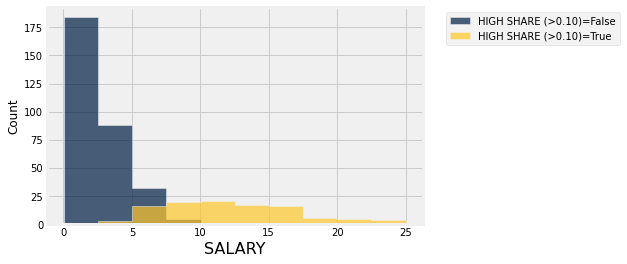

In [13]:
# SOLUTION
player_high_shares.hist('SALARY', group='HIGH SHARE (>0.10)', normed=False)

### Downloading as PDF

Download this notebook as a pdf by clicking <b><code>File > Download as > PDF via LaTeX (.pdf)</code></b>. Turn in the PDF into bCourses under the corresponding assignment.